In [1]:
import pandas as pd

In [2]:
jsondf = pd.read_json(r'dim_customer.json')

In [3]:
df = pd.read_csv("fct_invoice.csv") 

In [4]:
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [5]:
jsondf

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


# Easy

1. How many unique customers are in the dataset?

In [6]:
df['customer_id'].nunique()

5191

2. What are the different categories of products available? How many unique categories are there?

In [7]:
df['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [8]:
df['category'].nunique()

8

3. Which payment method is the most popular? How many times was it used?

In [9]:
most_popular=df['payment_method'].value_counts().idxmax()
times_used=str(df['payment_method'].value_counts().max())
print('The most popular payment method is: ' + most_popular)
print("It was used " + times_used + " times")


The most popular payment method is: Cash
It was used 44447 times


In [10]:
df['payment_method'].value_counts().nlargest(1)

Cash    44447
Name: payment_method, dtype: int64

# Medium

1. What are the three most popular categories, by total sales?

In [11]:
df['total_sales']=df['price']*df['quantity']
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [12]:
df.groupby('category')['total_sales'].sum().nlargest(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

3. What are the total sales attributed to customers over the age of 45?

In [13]:
merged_df = df.merge(jsondf, how="left", left_on = 'customer_id', right_on = 'id')
merged_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,34.0,Danielle,F,3433,Rivera
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,46.0,Christopher,M,644,Stephens
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,46.0,Laura,F,4900,Kelly
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,NaN,Richard,M,1089,Rhodes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25,53.0,Michelle,F,2344,Stevens
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92,NaN,Lauren,F,172,Perkins
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92,36.0,Mark,M,425,Pham
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00,64.0,David,M,577,Williams


In [14]:
merged_df.loc[merged_df['age'] > 45, 'total_sales'].sum()

82039768.15

In [15]:
merged_df['category']


0               Clothing
1                  Shoes
2               Clothing
3                  Shoes
4                  Books
              ...       
99452           Souvenir
99453    Food & Beverage
99454    Food & Beverage
99455         Technology
99456           Souvenir
Name: category, Length: 99457, dtype: object

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

/var/folders/_0/6002_v9d28d4w73m1vrjjf140000gn/T/ipykernel_32651/3437340888.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_df['invoice_date'] = pd.to_datetime(merged_df['invoice_date'])


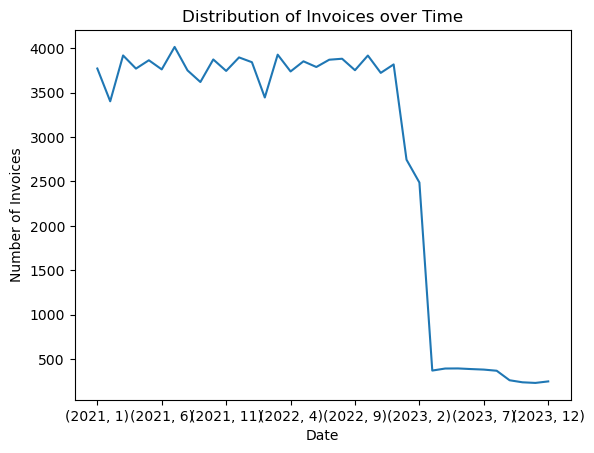

In [16]:
import matplotlib.pyplot as plt

merged_df['invoice_date'] = pd.to_datetime(merged_df['invoice_date'])


merged_df['year'] = merged_df['invoice_date'].dt.year
merged_df['month'] = merged_df['invoice_date'].dt.month


monthly_counts = merged_df.groupby(['year', 'month']).size()

monthly_counts.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Invoices')
plt.title('Distribution of Invoices over Time')
plt.show()


From the year 2021 to 2022, the graph shows that the number of invoices ranges from 3500 to 4000. Also, the graph shows that the number of invoices went down from 2022 indicating that there are less customers buying from shopping malls.

# Hard

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [17]:
age_ranges = [(10, 19), (20, 29), (30, 39), (40, 49), (50, 59), (60, 69), (70, 79), (80, 89), (90, 99), (100, 109)]

def get_age_range(age):
    for lower, upper in age_ranges:
        if age >= lower and age <= upper:
            return f"{lower}-{upper}"
    return None

merged_df['age_range'] = merged_df['age'].apply(get_age_range)

pivot_table = pd.pivot_table(data=merged_df, index='category', columns='age_range', values='total_sales', aggfunc='sum')

pivot_table = pivot_table.fillna(0)

pivot_table

age_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
